# Better Predictions

## Reduce Model Variance with Ensemble Learning

## High Variance of MLP Model

2024-04-12 17:08:26.382662: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


> 0.789
> 0.749
> 0.771
> 0.763
> 0.751
> 0.789
> 0.751
> 0.757
> 0.766
> 0.766
> 0.791
> 0.780
> 0.774
> 0.757
> 0.769
> 0.743
> 0.771
> 0.766
> 0.760
> 0.771
> 0.771
> 0.769
> 0.734
> 0.766
> 0.771
> 0.769
> 0.774
> 0.769
> 0.737
> 0.763
Scores Mean: 0.765, Standard Deviation: 0.014


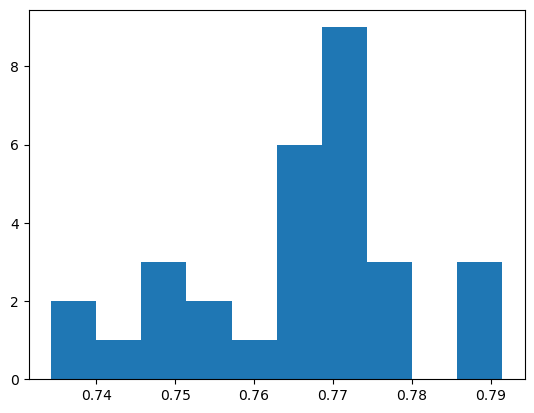

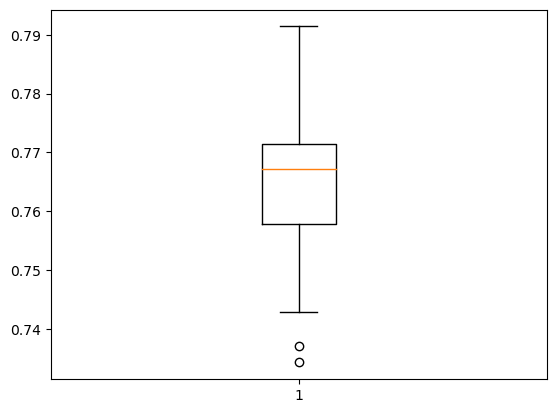

In [1]:
# demonstrate high variance of mlp model on blobs classification problem
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot
# fit and evaluate a neural net model on the dataset
def evaluate_model(trainX, trainy, testX, testy):
  # define model
  model = Sequential()
  model.add(Dense(15, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
  # fit model
  model.fit(trainX, trainy, epochs=200, verbose=0)
  # evaluate the model
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return test_acc
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# repeated evaluation
n_repeats = 30
scores = list()
for _ in range(n_repeats):
  score = evaluate_model(trainX, trainy, testX, testy) 
  print('> %.3f' % score)
  scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores))) # histogram of distribution
pyplot.hist(scores, bins=10)
pyplot.show()
# boxplot of distribution
pyplot.boxplot(scores)
pyplot.show()

## Model Averaging Ensemble

1
11/11 [==============================] - 0s 365us/step
> 0.780
2
11/11 [==============================] - 0s 357us/step
> 0.774
3
11/11 [==============================] - 0s 466us/step
> 0.771
4
11/11 [==============================] - 0s 779us/step
> 0.771
5
11/11 [==============================] - 0s 366us/step
> 0.771
6
11/11 [==============================] - 0s 363us/step
> 0.769
7
11/11 [==============================] - 0s 454us/step
> 0.766
8
11/11 [==============================] - 0s 365us/step
> 0.771
9
11/11 [==============================] - 0s 382us/step
> 0.771
10
11/11 [==============================] - 0s 352us/step
> 0.771
11
11/11 [==============================] - 0s 325us/step
> 0.771
12
11/11 [==============================] - 0s 370us/step
> 0.769
13
11/11 [==============================] - 0s 338us/step
> 0.771
14
11/11 [==============================] - 0s 373us/step
> 0.771
15
11/11 [==============================] - 0s 344us/step
> 0.771
16
11/11 [=========

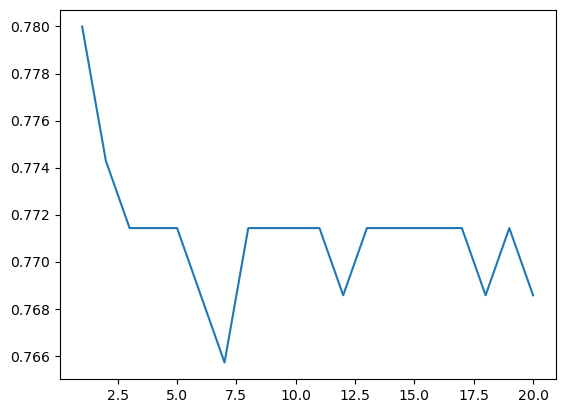

In [2]:
from keras.utils import to_categorical
from keras.models import Sequential

from keras.layers import Dense
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from numpy import array
from numpy import argmax
import numpy
# fit model on dataset
def fit_model(trainX, trainy):
  # define model
  model = Sequential()
  model.add(Dense(15, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # fit model
  model.fit(trainX, trainy, epochs=200, verbose=0)
  return model
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
  # make predictions
  yhats = [model.predict(testX) for model in members]
  yhats = array(yhats)
  # sum across ensemble members
  summed = numpy.sum(yhats, axis=0)
  # argmax across classes
  result = argmax(summed, axis=1)
  return result
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  # select a subset of members
  subset = members[:n_members]
  print(len(subset))
  # make prediction
  yhat = ensemble_predictions(subset, testX)
  # calculate accuracy
  return accuracy_score(testy, yhat)
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
# fit all models
n_members = 20
members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate different numbers of ensembles
scores = list()
for i in range(1, n_members+1):
  score = evaluate_n_members(members, i, testX, testy) 
  print('> %.3f' % score)
  scores.append(score)
x_axis = [i for i in range(1, n_members+1)]
pyplot.plot(x_axis, scores)
pyplot.show()